<b> PROJECT TITLE: Predicting Movie Rating and Building a Recommender System

<b> Problem Statement:

<b>Dataset Description:

<b> DATA WRANGLING

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from wordcloud import WordCloud, STOPWORDS

In [2]:
# upload data files.
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

There two datasets, credits and movies. The credits dataset includes movie id , movie title, cast and crew columns.

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


The movies dataset includes 20 columns such as budget, revenue, production companies, production countries, vote average, vote count,..etc.

In [5]:
# merge two datasets.
df = credits.merge(movies,right_on='id',left_on='movie_id',how='left')

In [6]:
df.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
movie_id                4803 non-null int64
title_x                 4803 non-null object
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null ob

We merged these two datasets on the common column, movie id. When merged these two datasets, we built a dataset includes 24 columns. Some columns have the same information so we will drop these same columns. 

In [8]:
# change genres, cast, production companies and countries columns from json to string

df['production_companies'] = df.production_companies.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['genres'] = df.genres.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['production_countries'] = df.production_countries.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['keywords'] = df.keywords.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['cast'] = df.cast.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])

In [9]:
# change crew column to director column from json to string

df['crew'] = df['crew'].apply(literal_eval)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
df['crew'] = df['crew'].apply(director)
df.rename(columns = {'crew':'director'}, inplace = True)

Some columns using in our data analysis such as genres, cast, crew, production companies, and production countries are in json format so we changed these columns to string format and selected necessary variables from these json formats. 

In [10]:
# find differences of movie title and its original title.

df[df['original_title'] != df['title_x']][['title_x', 'original_title']].head(10)

,title_x,original_title
97,Shin Godzilla,シン・ゴジラ
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,The Flowers of War,金陵十三釵
474,Evolution,Évolution
488,Arthur and the Invisibles,Arthur et les Minimoys
492,Top Cat Begins,Don Gato: El inicio de la pandilla
561,Two Brothers,Deux frères
678,Dragon Blade,天將雄師
719,This Is It,Michael Jackson's This Is It


We compared title and original title columns to understand what the difference is between these two columns. We see that original title is the name of movies in original language and title is the English name of movies. We will use English title of movies for our analysis so we will delete original title column.

In [11]:
# delete unneccassary columns
drop_columns = ['movie_id', 'overview', 'status','tagline', 'homepage','spoken_languages', 'id','original_title', 'title_y']
df = df.drop(drop_columns, axis = 1)

We dropped unncessary columns such as dublicate columns, homepage, spoken_language, original title, status, etc.

In [12]:
# change title_x column name to title
df = df.rename(columns = {'title_x': 'title'})

While we merged two datasets, the dublicated name of columns changed to title_x. We again changed the title_x column name to title. 

In [13]:
# find duplicates rows
print('Number of rows:', df.title.shape[0])
df.title.unique()
print('Number of rows after dropping duplicates:', df.shape[0])

Number of rows: 4803
Number of rows after dropping duplicates: 4803


There is no duplicated rows.

In [14]:
# find zero values of revenue, budget and runtime columns.
print('Number of movies having zero revenue:',df[df['revenue'] == 0].shape[0])
print('Number of movies having zero budget:',df[df['budget'] == 0].shape[0])
print('Number of movies having zero runtime:',df[df['runtime'] == 0].shape[0])

Number of movies having zero revenue: 1427
Number of movies having zero budget: 1037
Number of movies having zero runtime: 35


In [15]:
# rename zero values to null values and convert revenue and budget to integer.

df['revenue'] = df['revenue'].replace(0, np.NAN)
df['budget'] = df['budget'].replace(0, np.NAN)
df['runtime'] = df['runtime'].replace(0, np.NAN)

Every movies has to be revenue, bugdet and runtime so we checked the zero values in these columns. These columns have zero values and this is not meaningful so we replaced zero values with nan values.

In [16]:
df.head()

,title,cast,director,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,7.2,11800
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,300000000.0,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,9.610000e+08,169.0,6.9,4500
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,245000000.0,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",en,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,8.806746e+08,148.0,6.3,4466
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,250000000.0,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",en,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1.084939e+09,165.0,7.6,9106
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,260000000.0,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",en,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,2.841391e+08,132.0,6.1,2124


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 15 columns):
title                   4803 non-null object
cast                    4803 non-null object
director                4773 non-null object
budget                  3766 non-null float64
genres                  4803 non-null object
keywords                4803 non-null object
original_language       4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 3376 non-null float64
runtime                 4766 non-null float64
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(5), int64(1), object(9)
memory usage: 600.4+ KB


After cleaning the data, we have 15 columns and 4803 rows with nan values. Title, Cast, Director, Genres ,Keywords, Original Language, Production Companies and Production Countries and Release Date are categorical features. Budget, Popularity, Revenue, Runtime, Vote Averagea and Vote Count are numerical variables.

<b> EXPLORATORY DATA ANALYSIS

<b> Genre, Actor and Director

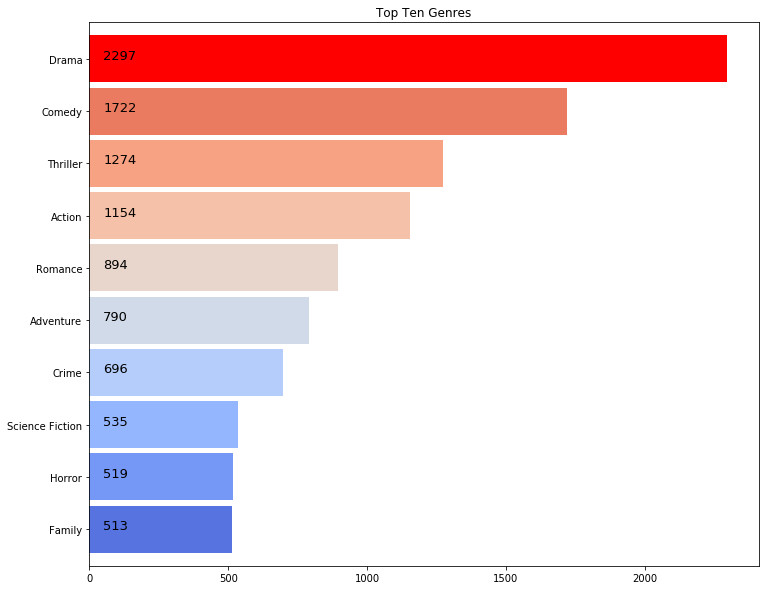

In [18]:
# create a bar chart of top ten genres
plt.figure(figsize=(12,10))
list1=[]
for i in df['genres']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(50, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Genres')
plt.show()

We counted the number of movies for each genre. From above graph, we can say that Drama is the most producted genre in movie sector with 2297 movies. Comedy and thriller comes from drama. 

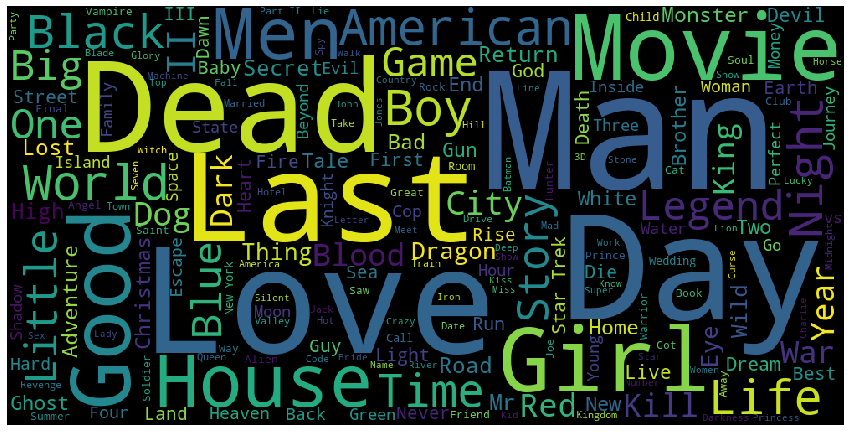

In [20]:
# build a wordcloud for movie titles.
df['title'] = df['title'].astype('str')
title_corpus = ' '.join(df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=500, width=1000).generate(title_corpus)
plt.figure(figsize=(15,10))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

When we analyze the movie titles by creating a world cloud., we see that 'Man, Love, Day, Dead, Last, Girl, etc' are the most commonly used words in movie titles. 

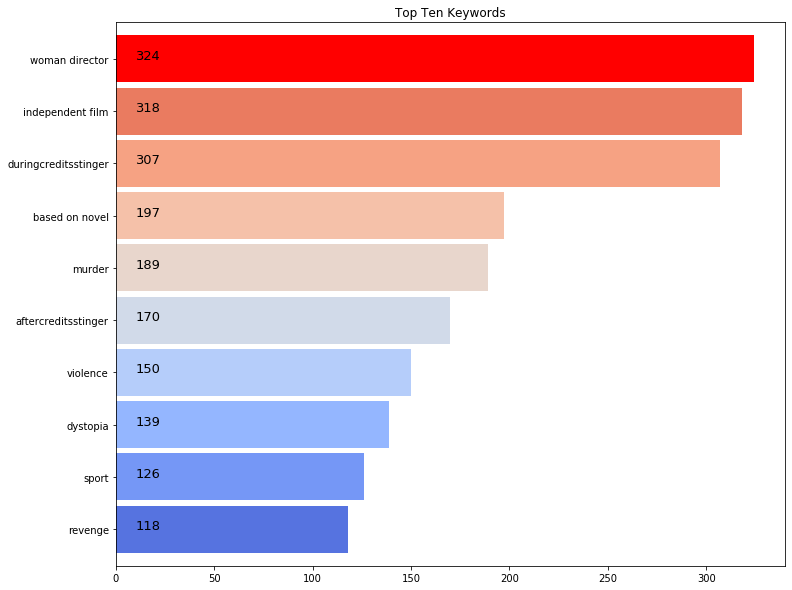

In [21]:
# create a bar chart of top ten keywords
plt.figure(figsize=(12,10))
list_keywords=[]
for i in df['keywords']:
    list_keywords.extend(i)
ax=pd.Series(list_keywords).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(pd.Series(list_keywords).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(10, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Keywords')
plt.show()

From above graph, we see that woman director, independent film, during credits stinger, based on novel and murder are respectively top five keywords that are used to describe movies. 

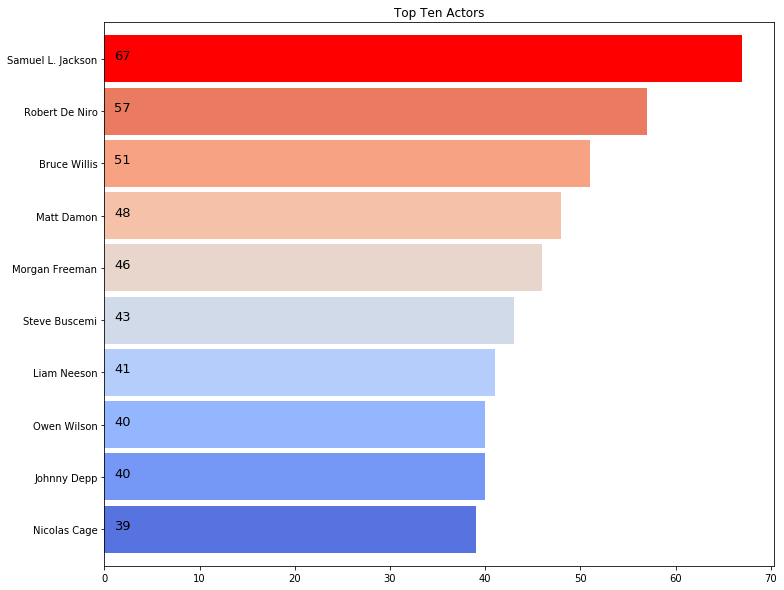

In [22]:
# create a bar chart of top ten actors
plt.figure(figsize=(12,10))
list_actor=[]
for i in df['cast']:
    list_actor.extend(i)
ax=pd.Series(list_actor).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(pd.Series(list_actor).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(1, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Actors')
plt.show()

Samual L. Jackson is the first actor having roles in 67 movies. Then, Robert De Niro, Bruce Wills and Matt Damon follow him having  57, 51 and 48 roles respectively.

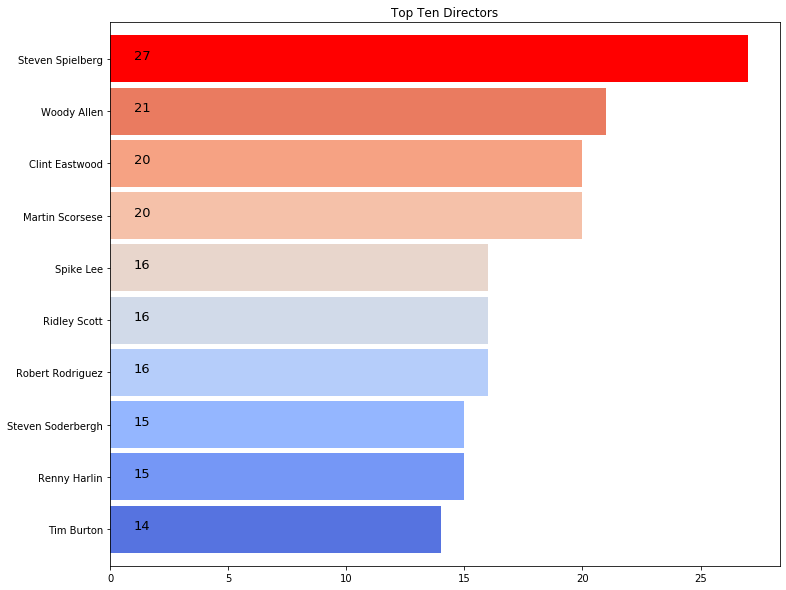

In [23]:
# create a bar chart of top ten directors
plt.figure(figsize=(12,10))
ax=df.director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(df.director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(1, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Directors')
plt.show()

From the above graph, we can say that Steven Spielberg is the most producted director with 27 movies.Then, Woody Allen follows him with 21 movies. Both Clien Esatwood and Martin Scorsese have 20 movies coming in the third place.

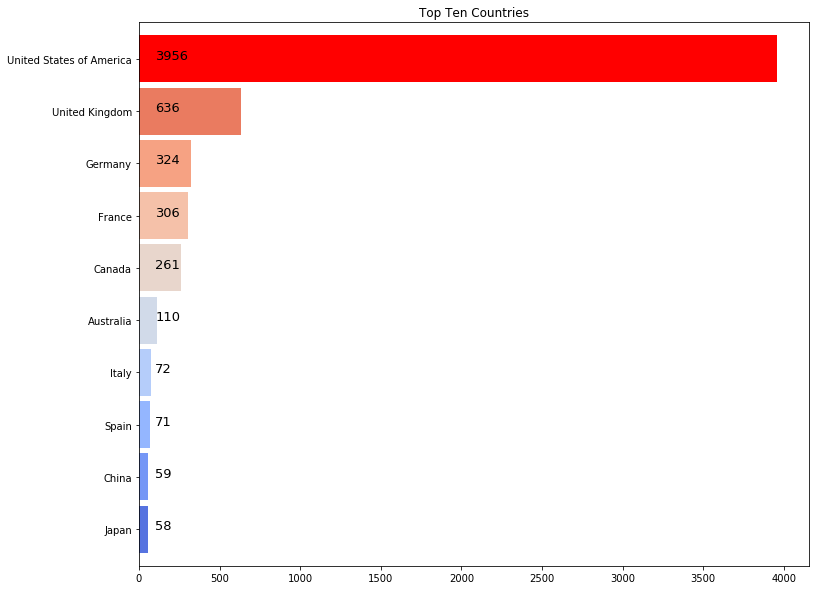

In [24]:
# create a bar chart of top ten countries.
plt.figure(figsize=(12,10))
list_country=[]
for i in df['production_countries']:
    list_country.extend(i)
ax=pd.Series(list_country).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(pd.Series(list_country).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(100, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Countries')
plt.show()

In [25]:
# find rate of movies produced by countries.
countries = pd.DataFrame(pd.Series(list_country).value_counts(normalize = True)).round(2)
countries.columns= ['Percentage of Countries']
countries.head(10)

,Percentage of Countries
United States of America,0.61
United Kingdom,0.10
Germany,0.05
France,0.05
Canada,0.04
Australia,0.02
Italy,0.01
Spain,0.01
China,0.01
Japan,0.01


%61 of the movies is produced by the United States. It is the top producer country. United Kingdom is the second country producing %10 of the movies. France and Germany follow the United Kingdom having the %5 of the movies.

In [27]:
# find rate of original languages of movies
languages = pd.DataFrame(df.original_language.value_counts(normalize = True)).round(2)
languages.columns= ['Percentage of Languages']
languages.head(10)

,Percentage of Languages
en,0.94
fr,0.01
es,0.01
de,0.01
zh,0.01
hi,0.00
ja,0.00
it,0.00
cn,0.00
ko,0.00


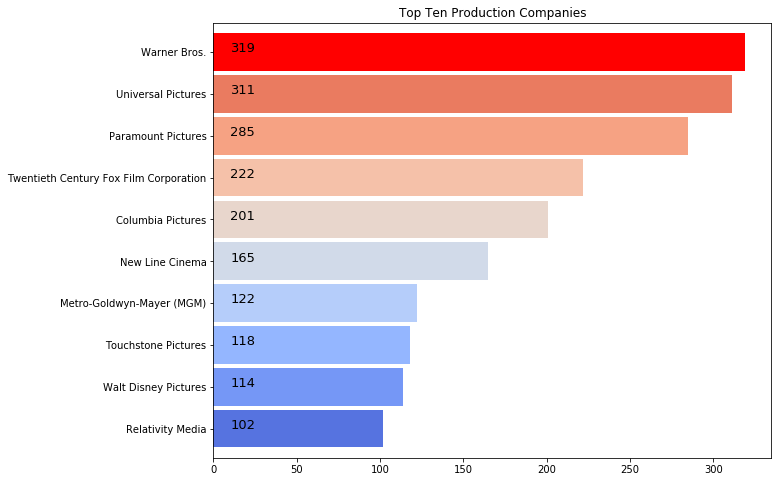

In [128]:
# create a bar chart of top ten companies. 
plt.figure(figsize=(10,8))
list_company=[]
for i in df['production_companies']:
    list_company.extend(i)
ax=pd.Series(list_company).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
for i, v in enumerate(pd.Series(list_company).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(10, i, v,fontsize=13,color='black')
ax.patches[9].set_facecolor('r')
plt.title('Top Ten Production Companies')
plt.show()

In [129]:
# create release year,month and day columns.
df['release_date'] = pd.to_datetime(df['release_date'])
years = df['release_date'].dt.year.round()
months = df['release_date'].dt.month_name(locale = 'English')
days = df['release_date'].dt.day_name(locale = 'English')

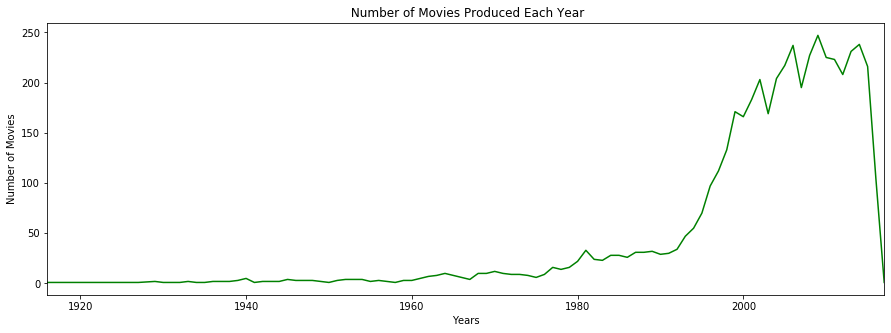

In [130]:
# plot time series of produced movies.
plt.figure(figsize=(15,5))
years.value_counts().sort_index().plot(color = 'green')
plt.xlabel('Years')
plt.ylabel('Number of Movies')
plt.title(' Number of Movies Produced Each Year')
plt.show()

In [131]:
df.release_date.describe()

count                    4802
unique                   3280
top       2006-01-01 00:00:00
freq                       10
first     1916-09-04 00:00:00
last      2017-02-03 00:00:00
Name: release_date, dtype: object

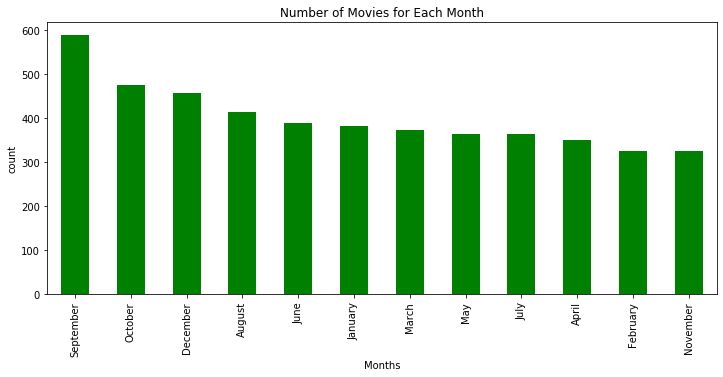

In [132]:
# plot number of movies for each month
plt.figure(figsize=(12,5))
months.value_counts().plot.bar(color='green')
plt.title('Number of Movies for Each Month')
plt.xlabel('Months')
plt.ylabel('count')
plt.show()

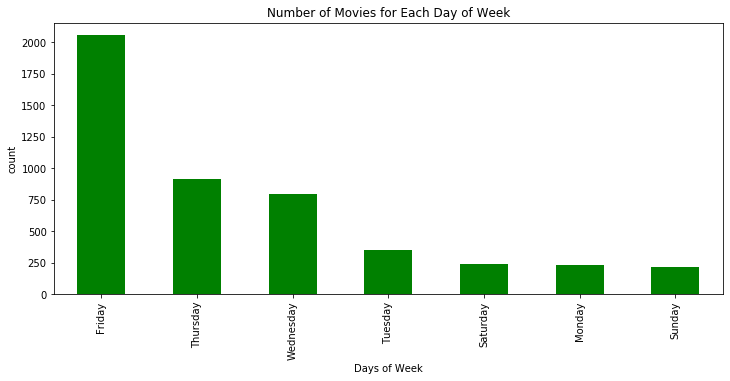

In [133]:
# plot number of movies for each day of week.
plt.figure(figsize=(12,5))
days.value_counts().plot.bar( color='green')
plt.title('Number of Movies for Each Day of Week')
plt.xlabel('Days of Week')
plt.ylabel('count')
plt.show()

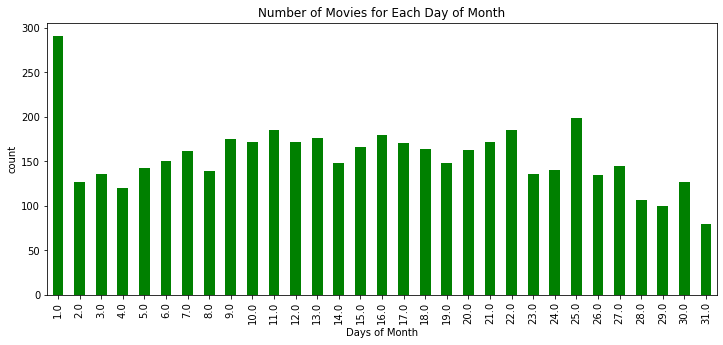

In [134]:
# plot number of movies for each day of month.
plt.figure(figsize=(12,5))
df['release_date'].dt.day.value_counts().sort_index().plot.bar(color='green')
plt.title('Number of Movies for Each Day of Month')
plt.xlabel('Days of Month')
plt.ylabel('count')
plt.show()

C:\Users\skisa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skisa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'count')

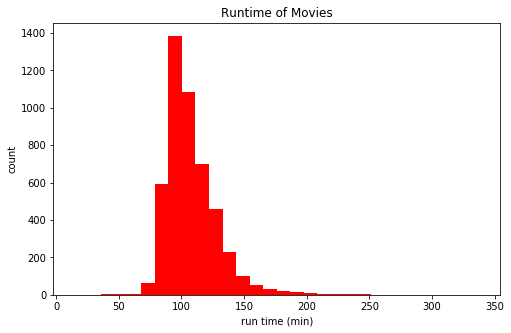

In [135]:
# plot the histogram of movies runtime.
plt.figure(figsize = (8,5))
plt.hist(df['runtime'], bins = 30, color = 'r')
plt.title('Runtime of Movies')
plt.xlabel('run time (min)')
plt.ylabel('count')

In [136]:
df.runtime.describe()

count    4766.000000
mean      107.660722
std        20.749424
min        14.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [137]:
# find shortest movies.
df[['title','runtime','release_date']].sort_values('runtime') .head(10)

,title,runtime,release_date
4466,Vessel,14.0,2012-10-28
4709,A Charlie Brown Christmas,25.0,1965-12-09
3626,Sea Rex 3D: Journey to a Prehistoric World,41.0,2010-05-14
3471,Dolphins and Whales: Tribes of the Ocean,42.0,2008-02-15
3354,Michael Jordan to the Max,46.0,2000-05-05
4756,The Call of Cthulhu,47.0,2005-01-01
3403,Alpha and Omega: The Legend of the Saw Tooth Cave,53.0,2014-07-21
4685,The Case of the Grinning Cat,59.0,2004-12-05
4785,Stories of Our Lives,60.0,2014-09-05
1620,Winnie the Pooh,63.0,2011-04-13


In [138]:
# find longest movies.
df[['title','runtime','release_date']].sort_values('runtime', ascending=False,) .head(10)

,title,runtime,release_date
2384,Carlos,338.0,2010-05-19
2631,The Company,276.0,2007-08-05
1922,Gettysburg,254.0,1993-10-08
1125,Cleopatra,248.0,1963-06-12
2373,Hamlet,242.0,1996-12-25
3510,Emma,240.0,2009-10-11
3813,Gone with the Wind,238.0,1939-12-15
1663,Once Upon a Time in America,229.0,1984-02-16
4497,Woodstock,225.0,1970-03-26
1109,Heaven's Gate,219.0,1980-11-19


Text(0, 0.5, 'count')

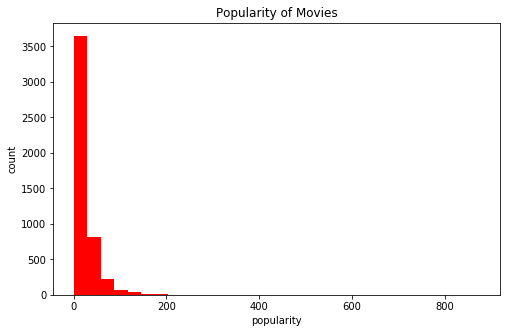

In [139]:
# plot the histogram of movies popularity.
plt.figure(figsize = (8,5))
plt.hist(df['popularity'], bins = 30, color = 'r')
plt.title('Popularity of Movies')
plt.xlabel('popularity')
plt.ylabel('count')

In [140]:
df.popularity.describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

In [141]:
# find most popular movies.
df[['title','popularity','release_date']].sort_values('popularity', ascending=False,).head(10)

,title,popularity,release_date
546,Minions,875.581305,2015-06-17
95,Interstellar,724.247784,2014-11-05
788,Deadpool,514.569956,2016-02-09
94,Guardians of the Galaxy,481.098624,2014-07-30
127,Mad Max: Fury Road,434.278564,2015-05-13
28,Jurassic World,418.708552,2015-06-09
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
82,Dawn of the Planet of the Apes,243.791743,2014-06-26
200,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
88,Big Hero 6,203.734590,2014-10-24


Text(0, 0.5, 'count')

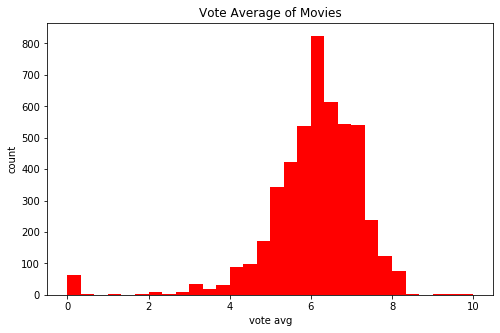

In [142]:
# plot the histogram of movies vote_avg.
plt.figure(figsize = (8,5))
plt.hist(df['vote_average'], bins = 30, color = 'r')
plt.title('Vote Average of Movies')
plt.xlabel('vote avg')
plt.ylabel('count')

In [143]:
df.vote_average.describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [144]:
df[['title','vote_average','vote_count','release_date']].sort_values('vote_average', ascending=False,).head(10)

,title,vote_average,vote_count,release_date
3519,Stiff Upper Lips,10.0,1,1998-06-12
4247,Me You and Five Bucks,10.0,2,2015-07-07
4045,"Dancer, Texas Pop. 81",10.0,1,1998-05-01
4662,Little Big Top,10.0,1,2006-01-01
3992,Sardaarji,9.5,2,2015-06-26
2386,One Man's Hero,9.3,2,1999-08-02
2970,There Goes My Baby,8.5,2,1994-09-02
1881,The Shawshank Redemption,8.5,8205,1994-09-23
2796,The Prisoner of Zenda,8.4,11,1937-09-03
3337,The Godfather,8.4,5893,1972-03-14


Text(0, 0.5, 'count')

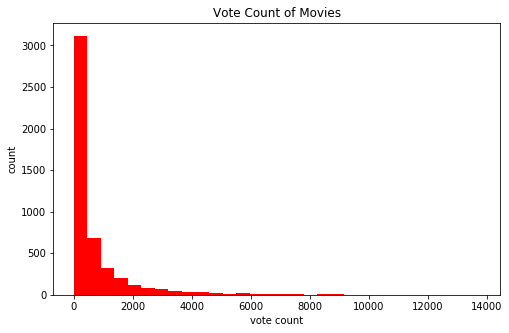

In [145]:
# plot the histogram of movies vote_avg.
plt.figure(figsize = (8,5))
plt.hist(df['vote_count'], bins = 30, color = 'r')
plt.title('Vote Count of Movies')
plt.xlabel('vote count')
plt.ylabel('count')

In [146]:
df.vote_count.describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

In [147]:
print('The number of movies having no vote:' , df.vote_count.loc[df['vote_count'] == 0].count())

The number of movies having no vote: 62


In [148]:
# find most voted movies.
df[['title','vote_average','vote_count','release_date']].sort_values('vote_count', ascending=False,).head(10)

,title,vote_average,vote_count,release_date
96,Inception,8.1,13752,2010-07-14
65,The Dark Knight,8.2,12002,2008-07-16
0,Avatar,7.2,11800,2009-12-10
16,The Avengers,7.4,11776,2012-04-25
788,Deadpool,7.4,10995,2016-02-09
95,Interstellar,8.1,10867,2014-11-05
287,Django Unchained,7.8,10099,2012-12-25
94,Guardians of the Galaxy,7.9,9742,2014-07-30
426,The Hunger Games,6.9,9455,2012-03-12
127,Mad Max: Fury Road,7.2,9427,2015-05-13


In [149]:
# find most vote average movies having more than 2000 votes.
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'release_date']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,release_date
1881,The Shawshank Redemption,8.5,8205,1994-09-23
3337,The Godfather,8.4,5893,1972-03-14
3232,Pulp Fiction,8.3,8428,1994-10-08
662,Fight Club,8.3,9413,1999-10-15
2294,Spirited Away,8.3,3840,2001-07-20
2731,The Godfather: Part II,8.3,3338,1974-12-20
1818,Schindler's List,8.3,4329,1993-11-29
3865,Whiplash,8.3,4254,2014-10-10
2170,Psycho,8.2,2320,1960-06-16
1990,The Empire Strikes Back,8.2,5879,1980-05-17


C:\Users\skisa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skisa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'count')

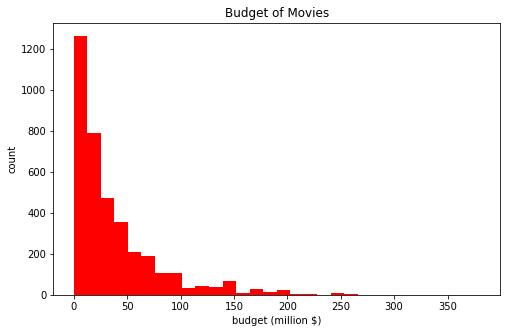

In [150]:
# plot the histogram of movies budget
plt.figure(figsize = (8,5))
plt.hist(df['budget']/1000000, bins = 30, color = 'r')
plt.title('Budget of Movies')
plt.xlabel('budget (million $)')
plt.ylabel('count')

In [151]:
df.budget.describe()

count    3.766000e+03
mean     3.704284e+07
std      4.264651e+07
min      1.000000e+00
25%      8.000000e+06
50%      2.300000e+07
75%      5.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [152]:
df[['title','budget','release_date']].sort_values('budget', ascending=False,).head(10)

,title,budget,release_date
17,Pirates of the Caribbean: On Stranger Tides,380000000.0,2011-05-14
1,Pirates of the Caribbean: At World's End,300000000.0,2007-05-19
7,Avengers: Age of Ultron,280000000.0,2015-04-22
10,Superman Returns,270000000.0,2006-06-28
4,John Carter,260000000.0,2012-03-07
6,Tangled,260000000.0,2010-11-24
5,Spider-Man 3,258000000.0,2007-05-01
13,The Lone Ranger,255000000.0,2013-07-03
46,X-Men: Days of Future Past,250000000.0,2014-05-15
22,The Hobbit: The Desolation of Smaug,250000000.0,2013-12-11


In [153]:
df[['title','budget','release_date']].sort_values('budget').head(10)

,title,budget,release_date
4247,Me You and Five Bucks,1.0,2015-07-07
4251,Fetching Cody,1.0,2005-10-01
4238,Modern Times,1.0,1936-02-05
4293,The Algerian,1.0,2015-08-07
4369,Slam,1.0,1998-10-07
4424,Fear Clinic,1.0,2014-10-31
4262,Incident at Loch Ness,1.0,2004-12-17
4140,"To Be Frank, Sinatra at 100",2.0,2015-12-12
3967,Four Single Fathers,3.0,2009-01-15
3687,Without Men,4.0,2011-06-29


C:\Users\skisa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skisa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'count')

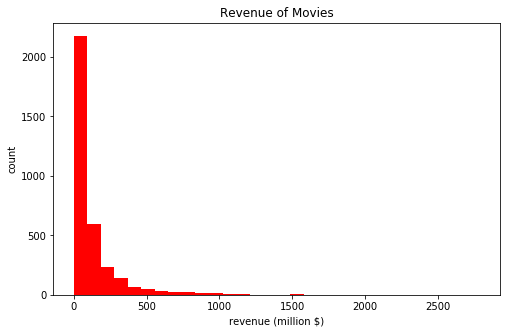

In [154]:
# plot the histogram of movies budget
plt.figure(figsize = (8,5))
plt.hist(df['revenue']/1000000, bins = 30, color = 'r')
plt.title('Revenue of Movies')
plt.xlabel('revenue (million $)')
plt.ylabel('count')

In [157]:
df[['title','revenue','release_date']].sort_values('revenue', ascending=False,).head(10)

,title,revenue,release_date
0,Avatar,2.787965e+09,2009-12-10
25,Titanic,1.845034e+09,1997-11-18
16,The Avengers,1.519558e+09,2012-04-25
28,Jurassic World,1.513529e+09,2015-06-09
44,Furious 7,1.506249e+09,2015-04-01
7,Avengers: Age of Ultron,1.405404e+09,2015-04-22
124,Frozen,1.274219e+09,2013-11-27
31,Iron Man 3,1.215440e+09,2013-04-18
546,Minions,1.156731e+09,2015-06-17
26,Captain America: Civil War,1.153304e+09,2016-04-27


In [158]:
df[['title','revenue','release_date']].sort_values('revenue').head(10)

,title,revenue,release_date
3372,Split Second,5.0,1992-05-01
3875,Dreaming of Joseph Lees,7.0,1999-10-29
3419,Bran Nue Dae,7.0,2009-08-09
3428,Bats,10.0,1999-10-22
2933,F.I.S.T.,11.0,1978-04-26
3131,Of Horses and Men,11.0,2013-08-30
1655,Chasing Liberty,12.0,2004-01-09
2485,The Cookout,12.0,2004-09-03
1912,Angela's Ashes,13.0,1999-12-25
1771,The 51st State,14.0,2001-12-07


In [159]:
profit = df['revenue'] - df['budget']
df[['title','revenue','release_date']].sort_values('revenue', ascending=False,).head(10)

Text(0.5, 1, 'CORRELATION MATRIX')

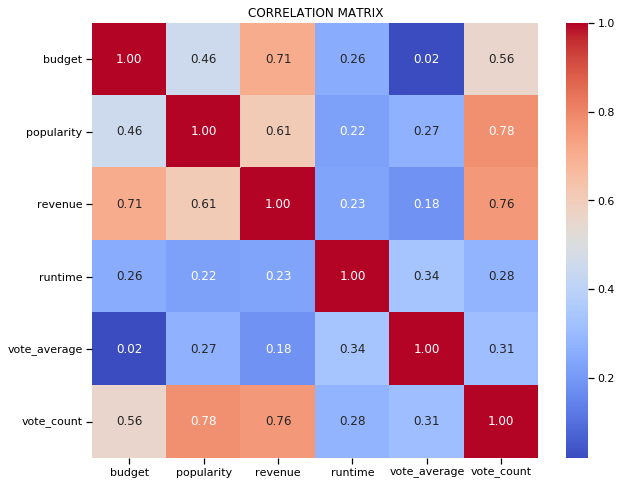

In [166]:
# visualize the correlation between numeric variables.
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "coolwarm" )
plt.title('CORRELATION MATRIX')